In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 8.04 s, sys: 1.28 s, total: 9.32 s
Wall time: 10.8 s


In [3]:
#todo

# i wonder if we can also make the text on the colour bars horizontal so it's easier to read (see US example below)
# ideally have whole numbers on scales and remove unnecessary placeholder 0s (e.g. "10.0, 20.0")
# mostly done for 1plus3 vertical plots. make 4pp and 3pp consistent with these
# hide alternate tick label and rotate ticks back to horizontal: https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
# for label in cbar.ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)

Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
CPU times: user 4min 16s, sys: 2.68 s, total: 4min 18s
Wall time: 4min 22s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

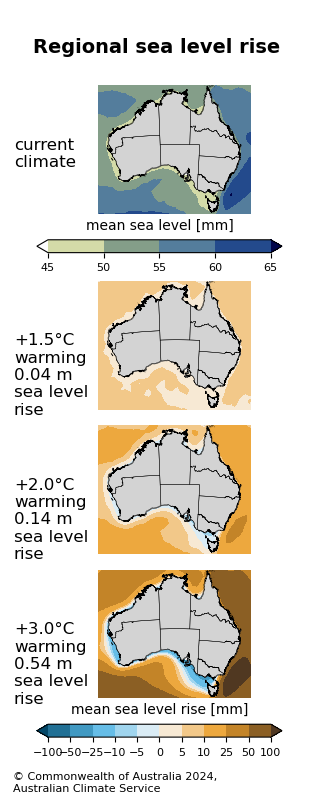

In [4]:
%%time
# regional sea level rise

var="SL1"

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_ssp245_yearly_final.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0, TYEAR=2020).drop_vars(["PERCENTILE", "PERCENTILE_bnds"])

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW1.5_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW2.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW3.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12["SL"],
                       gwl12_cmap=cmap_dict["ipcc_slev_seq"],
                       gwl12_cbar_extend= "both",
                       gwl12_cbar_label= "mean sea level [mm]",
                       gwl12_ticks= np.arange(45,70,5),
                       ds_gwl15=ds_gwl15[var] - 40,
                       ds_gwl20=ds_gwl20[var] - 140,
                       ds_gwl30=ds_gwl30[var] - 540,
                       regions = regions,
                       title = "Regional sea level rise",
                       cmap = cmap_dict["ipcc_slev_div"],
                       ticks = [-100,-50, -25, -10, -5, 0, 5, 10, 25, 50, 100],
                       cbar_label = "mean sea level rise [mm]",
                       cbar_extend="both",
                       watermark="",
                       mask_not_australia=False,
                       mask_australia=True,
                       contourf=True,
                       subplot_titles=["current\nclimate",]+[f"+{gwl}\N{DEGREE SIGN}C\nwarming\n{slr} m\nsea level\nrise" for gwl, slr in [("1.5","0.04"), ("2.0","0.14"), ("3.0","0.54")]],
                       issued_date="",
                       orientation="vertical",
                       tick_rotation=0,
                    )

CPU times: user 2min 13s, sys: 291 ms, total: 2min 13s
Wall time: 2min 13s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

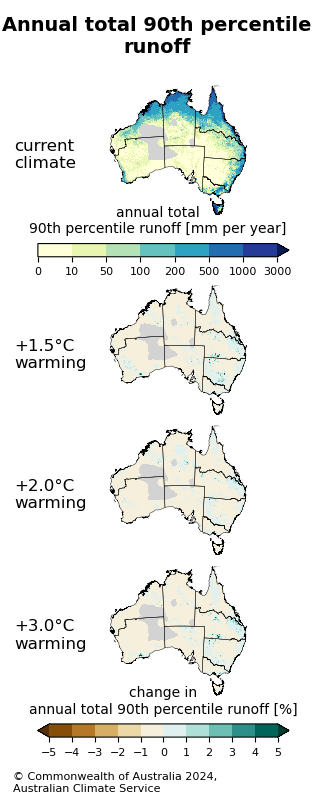

In [6]:
%%time

var="qtot"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_annual_total_90perc/runoff_annual_total_90perc_perc/proj_runoff_annual_90_perc_rcp85_1.2.nc")\
.rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_annual_total_90perc/runoff_annual_total_90perc_change_perc/proj_runoff_annual_90_perc_change_rcp85_1.5.nc")\
.rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_annual_total_90perc/runoff_annual_total_90perc_change_perc/proj_runoff_annual_90_perc_change_rcp85_2.nc")\
.rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_annual_total_90perc/runoff_annual_total_90perc_change_perc/proj_runoff_annual_90_perc_change_rcp85_3.nc")\
.rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                        gwl12_cmap=cmap_dict["pr"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "annual total\n90th percentile runoff [mm per year]",
                         gwl12_ticks= [0,10,50,100,200,500, 1000, 3000,],
                       ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    agcd_mask=True,
                    title = "Annual total 90th percentile runoff",
                    # date_range="Change from present",
                    cmap = cmap_dict["pr_anom"],
                    # ticks = np.arange(-50, 51,10),
                    ticks = np.arange(-5, 5.1, 1),
                    cbar_label = "change in\nannual total 90th percentile runoff [%]",
                    cbar_extend="both",
                    watermark="",
                        orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                    tick_rotation=0,
)

CPU times: user 2min 29s, sys: 573 ms, total: 2min 29s
Wall time: 2min 29s


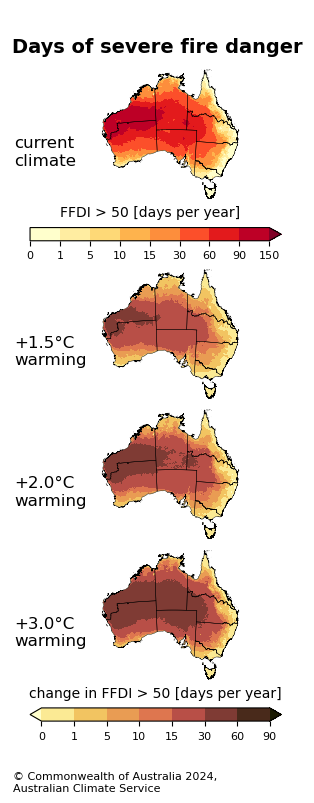

In [6]:
%%time 
# FFDI >50  multimodel median
var = "days50"

ffdi_ge50_mmm = xr.open_dataset(f"/g/data/ia39/ncra/fire/change_threshold_50.nc")

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/fire/GWL1p2_threshold_50.nc").drop_vars(["period"])
ds_gwl15 = ffdi_ge50_mmm.sel(period=1).drop_vars(["period"])
ds_gwl20 = ffdi_ge50_mmm.sel(period=2).drop_vars(["period"])
ds_gwl30 = ffdi_ge50_mmm.sel(period=3).drop_vars(["period"])


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["EHF_days"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "FFDI > 50 [days per year]",
                         gwl12_ticks= [0, 1, 5, 10, 15, 30, 60, 90, 150,],
                       ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Days of severe fire danger",
                    cmap = cmap_dict["ipcc_temp_seq"],
                    ticks = [0, 1, 5, 10, 15, 30, 60, 90,],
                    cbar_label = "change in FFDI > 50 [days per year]",
                    watermark="",
                    subplot_titles=["current\nclimate",
                                    "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                    orientation="vertical",
                    tick_rotation=0,
                   );


CPU times: user 1min 58s, sys: 365 ms, total: 1min 59s
Wall time: 1min 59s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

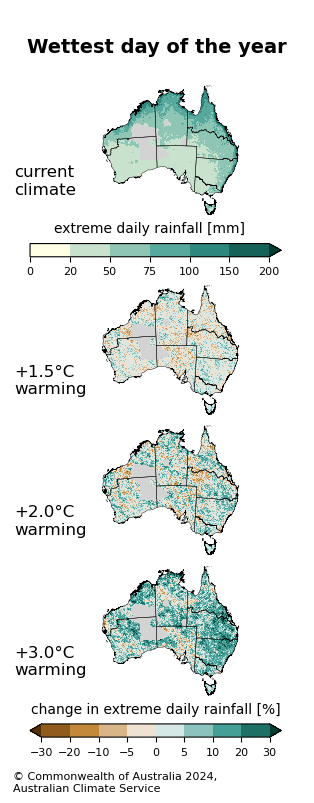

In [8]:
%%time
var = "prAdjust"

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1D_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1D_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1D_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1D_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change.nc")

plot_acs_hazard_1plus3(ds_gwl12 =ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_prec_seq'],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "extreme daily rainfall [mm]",
                         gwl12_ticks= [0, 20, 50, 75, 100, 150, 200],
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Wettest day of the year",
                        cmap = cmap_dict['ipcc_prec_div'],
                       ticks =[-30, -20, -10, -5, 0, 5, 10, 20, 30],
                        cbar_label = "change in extreme daily rainfall [%]",
                        cbar_extend="both",
                        watermark="",
                       agcd_mask=True,
                       orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0,
                      # vcentre=0,
                      )

CPU times: user 4min 1s, sys: 3.3 s, total: 4min 4s
Wall time: 4min 13s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

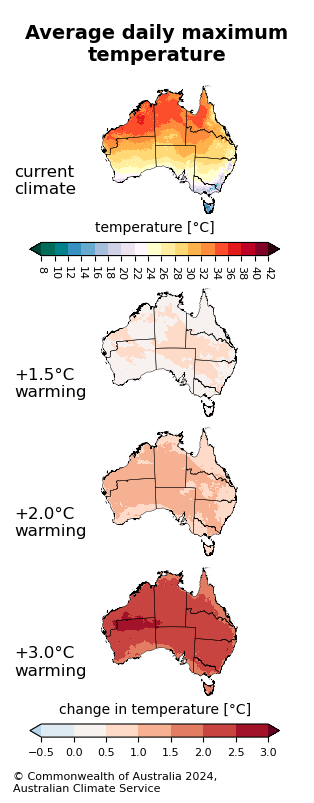

In [4]:
%%time 

var = "TXm"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXm/bias-corrected/ensemble/GWL-average/TXm_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

gwl12_kwargs={"cmap": cmap_dict["tasmax"],
                 "cbar_extend":"both",
                 "ticks":np.arange(8,43,2),
                 "tick_labels":None,
                 "cbar_label":"temperature [\N{DEGREE SIGN}C]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Average daily maximum temperature",
                        # date_range = f"Change from present climate",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-0.5, 3.1, 0.5),
                        cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                        watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                      issued_date="",
                       vcentre=0,
                       tick_rotation=0,
                       gwl12_tick_rotation=-90,
                       )

CPU times: user 2min 9s, sys: 336 ms, total: 2min 10s
Wall time: 2min 10s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

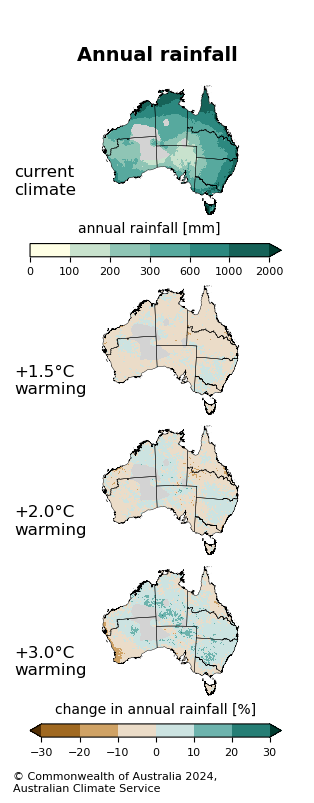

In [5]:
%%time
var = "prAdjust"

ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12_annual.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change_annual.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change_annual.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change_annual.nc")

plot_acs_hazard_1plus3(ds_gwl12 =ds_gwl12[var]*12,
                       gwl12_cmap=cmap_dict['ipcc_prec_seq'],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "annual rainfall [mm]",
                         gwl12_ticks= [0, 100, 200, 300, 600, 1000, 2000,],
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Annual rainfall",
                        # date_range="Change from present",
                        cmap = cmap_dict['ipcc_prec_div'],
                        # ticks = np.arange(-25, 26, 5.0),
                       ticks = np.arange(-30, 31, 10),
                        cbar_label = "change in annual rainfall [%]",
                        cbar_extend="both",
                        watermark="",
                       agcd_mask=True,
                       # cmap_bad="lightgrey",
                       orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0,
                      # vcentre=0,
                      )

In [6]:
# sea level trend placeholder

Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
Using contourf to plot data. Use with caution and check output for data crossing zero
CPU times: user 2min 27s, sys: 440 ms, total: 2min 27s
Wall time: 2min 27s


(<Figure size 300x650 with 4 Axes>, <GeoAxes: >)

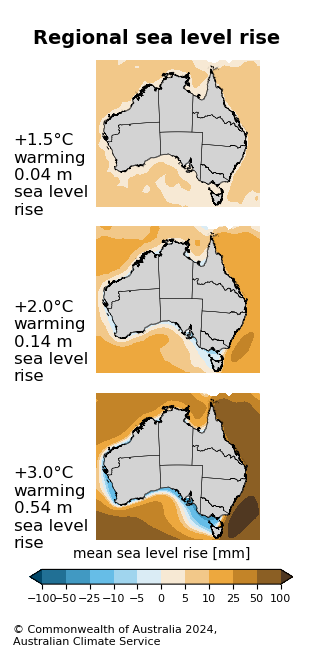

In [7]:
%%time
# regional sea level rise

var="SL1"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW1.5_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW2.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW3.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var] - 40,
                    ds_gwl20=ds_gwl20[var] - 140,
                    ds_gwl30=ds_gwl30[var] - 540,
                    regions = regions,
                    title = "Regional sea level rise",
                    cmap = cmap_dict["ipcc_slev_div"],
                    ticks = [-100,-50, -25, -10, -5, 0, 5, 10, 25, 50, 100],
                    cbar_label = "mean sea level rise [mm]",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                   contourf=True,
                   subplot_titles=[f"+{gwl}\N{DEGREE SIGN}C\nwarming\n{slr} m\nsea level\nrise" for gwl, slr in [("1.5","0.04"), ("2.0","0.14"), ("3.0","0.54")]],
                   issued_date="",
                    orientation="vertical",
                    tick_rotation=0,
                    )

CPU times: user 2min 6s, sys: 250 ms, total: 2min 6s
Wall time: 2min 6s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

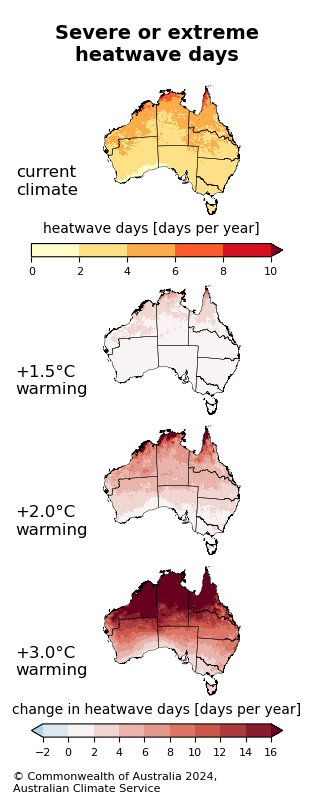

In [8]:
%%time 

var = "HW_sev_ext"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict["EHF_days"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "heatwave days [days per year]",
                         gwl12_ticks= np.arange(0,12, 2),
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Severe or extreme heatwave days",
                        # date_range = f"Change from present climate",
                        cmap = cmap_dict["ipcc_temp_div"],
                        ticks = np.arange(-2,18,2),
                        cbar_label = "change in heatwave days [days per year]",
                        watermark="",
                       orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0,
                       vcentre=0,
                      )

(<Figure size 600x450 with 2 Axes>, <GeoAxes: >)

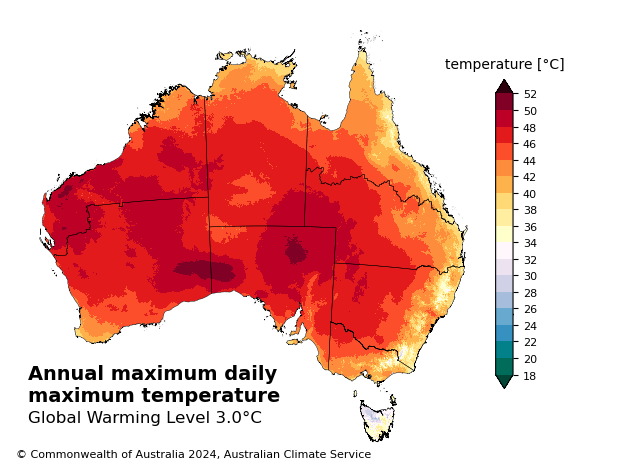

In [9]:
var="TXx"
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXx/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard(data=ds_gwl30[var],
                regions = regions,
                title = "Annual maximum daily\nmaximum temperature",
                date_range = "Global Warming Level 3.0\N{DEGREE SIGN}C",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "temperature [\N{DEGREE SIGN}C]",
                cbar_extend="both",
                watermark="",
                figsize=(6,4.5),
               issued_date="",)

CPU times: user 4min 1s, sys: 2.97 s, total: 4min 4s
Wall time: 4min 8s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

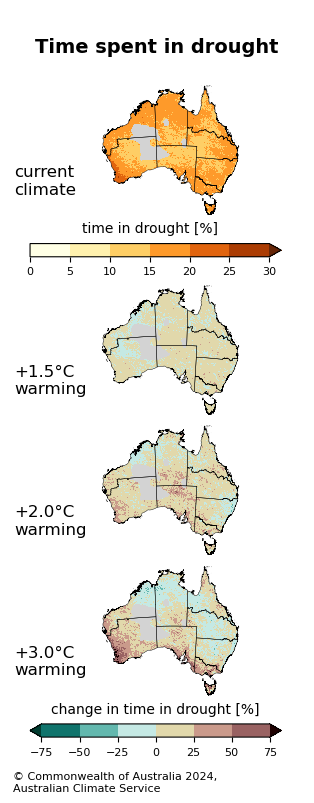

In [3]:
%%time
var="SPI3"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_GWL_1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL1.5_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL2.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                        gwl12_cmap=cm.YlOrBr,
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "time in drought [%]",
                         gwl12_ticks= np.arange(0,35, 5),
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Time spent in drought",
                        # date_range="Change from present",
                        cmap = cmap_dict["aridity_anom_r"],
                        ticks = np.arange(-75, 76, 25),
                        cbar_label = "change in time in drought [%]",
                        cbar_extend="both",
                        watermark="",
                       orientation="vertical",
                        agcd_mask=True,
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0)

In [4]:
# %%time
# var="SPI3"

# ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_GWL_1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

# ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL1.5_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
# ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL2.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
# ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

# plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
#                         gwl12_cmap=cm.YlOrBr,
#                          gwl12_cbar_extend= "max",
#                          gwl12_cbar_label= "time when standard precipitation index 3 is below -1 [%] *",
#                          gwl12_ticks= np.arange(0,35, 5),
#                         ds_gwl15=ds_gwl15[var],
#                         ds_gwl20=ds_gwl20[var],
#                         ds_gwl30=ds_gwl30[var],
#                         regions = regions,
#                         title = "Change in time spent in drought",
#                         # date_range="Change from present",
#                         # cmap = cmap_dict["aridity_anom_r"],
#                        cmap=mymap_r,
#                         ticks = np.arange(-75, 76, 25),
#                         cbar_label = "change in time when standard precipitation index 3 is below -1 [%]",
#                         cbar_extend="both",
#                         watermark="",
#                        orientation="vertical",
#                         agcd_mask=True,
#                         subplot_titles=["Current\nclimate",
#                                         "+1.5\N{DEGREE SIGN}C\nwarming",
#                                         "+2.0\N{DEGREE SIGN}C\nwarming",
#                                         "+3.0\N{DEGREE SIGN}C\nwarming"],
#                         issued_date="",
#                        tick_rotation=0,
#                        ylim=(-5,-50),
#                       outfile="/g/data/mn51/users/gt3409/plotting_maps/figures/SPI3_as_requested.png")

CPU times: user 3min 50s, sys: 3.63 s, total: 3min 54s
Wall time: 4min 2s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

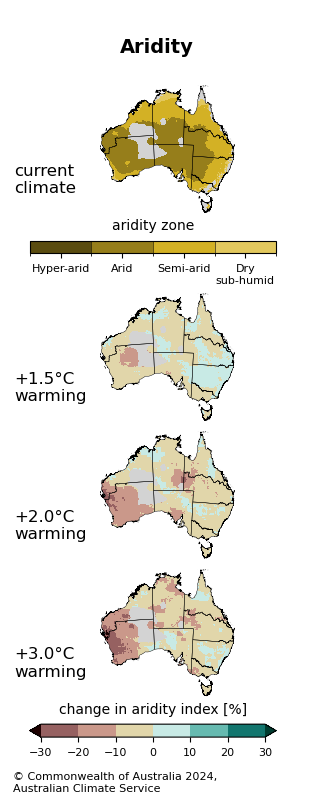

In [3]:
%%time
# placeholder for Change of Aridity index 

var="AI"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL12.nc").median(["model"])
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL15_prct-change-to-GWL12.nc").median(["model"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL20_prct-change-to-GWL12.nc").median(["model"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL30_prct-change-to-GWL12.nc").median(["model"])

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var].where(ds_gwl12[var]<0.65),
                        gwl12_cmap=cmap_dict["aridity"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "aridity zone",
                         gwl12_ticks=tick_dict['aridity_index_ticks'],
                        gwl12_tick_labels= ["Hyper-arid", "Arid", "Semi-arid", "Dry\nsub-humid"],
                        ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Aridity",
                        cmap = cmap_dict["aridity_anom"],
                        ticks = np.arange(-30, 31, 10),
                        cbar_label = "change in aridity index [%]",
                        cbar_extend="both",
                        watermark="",
                       orientation="vertical",
                        agcd_mask=True,
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0,)


CPU times: user 3min 54s, sys: 520 ms, total: 3min 54s
Wall time: 3min 55s


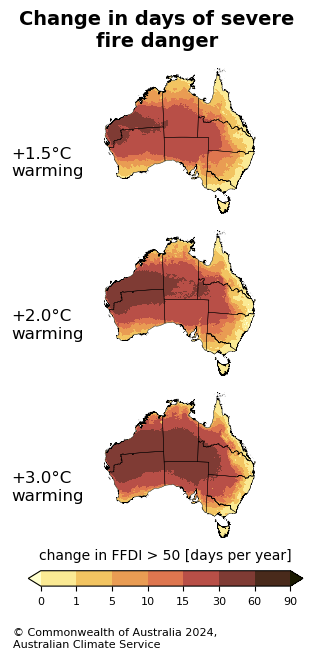

In [5]:
%%time 
# FFDI >50  multimodel median
var = "days50"

ffdi_ge50_mmm = xr.open_dataset(f"/g/data/ia39/ncra/fire/change_threshold_50.nc")

ds_gwl12 = ffdi_ge50_mmm.sel(period=0).drop_vars(["period"])
ds_gwl15 = ffdi_ge50_mmm.sel(period=1).drop_vars(["period"])
ds_gwl20 = ffdi_ge50_mmm.sel(period=2).drop_vars(["period"])
ds_gwl30 = ffdi_ge50_mmm.sel(period=3).drop_vars(["period"])


plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in days of severe fire danger",
                    cmap = cmap_dict["ipcc_temp_seq"],
                    ticks = [0, 1, 5, 10, 15, 30, 60, 90,],
                    cbar_label = "change in FFDI > 50 [days per year]",
                    watermark="",
                    subplot_titles=["+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                    orientation="vertical",
                    tick_rotation=0,
                   );

CPU times: user 2min 13s, sys: 233 ms, total: 2min 13s
Wall time: 2min 13s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

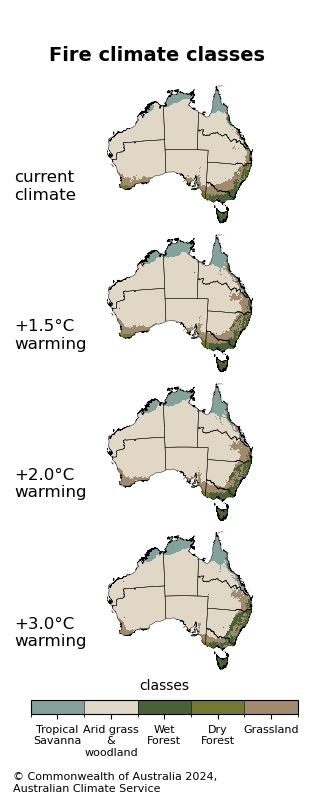

In [14]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]


plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire climate classes",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    # date_range="subtitle",
                    orientation="vertical",
                    subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                    tick_rotation=0,
                    )

CPU times: user 2min 9s, sys: 281 ms, total: 2min 9s
Wall time: 2min 10s


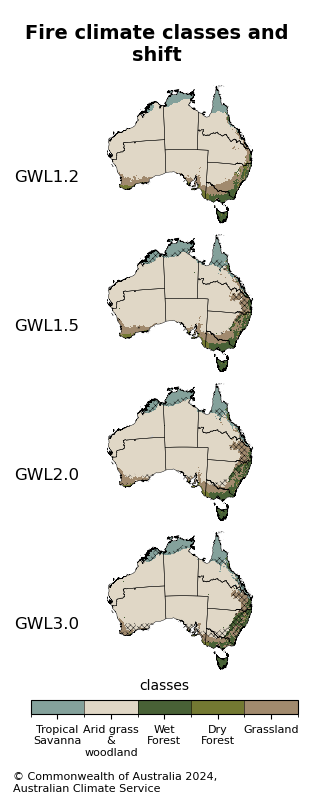

In [15]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    tick_rotation=0,
                    );

CPU times: user 2min 9s, sys: 327 ms, total: 2min 9s
Wall time: 2min 9s


(<Figure size 300x650 with 4 Axes>, <GeoAxes: >)

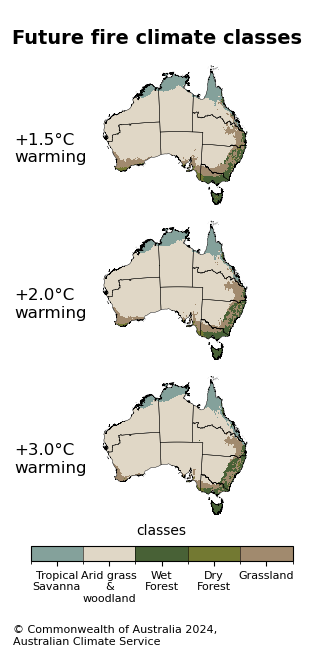

In [7]:
%%time
var = "fire_climate_class"

# ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]


plot_acs_hazard_3pp(
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Future fire climate classes",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    # date_range="subtitle",
                    subplot_titles=["+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                    orientation="vertical",
    tick_rotation=0,
                    
                    )

CPU times: user 2min 5s, sys: 267 ms, total: 2min 6s
Wall time: 2min 6s


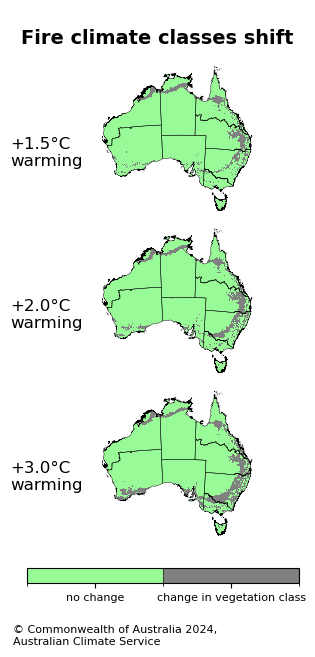

In [8]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire climate classes shift",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no change", "change in vegetation class",],
                    cbar_label = "",
                    watermark="",
                    subplot_titles=["+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                   orientation="vertical",
                   tick_rotation=0,
                   );

CPU times: user 2min 14s, sys: 280 ms, total: 2min 14s
Wall time: 2min 14s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

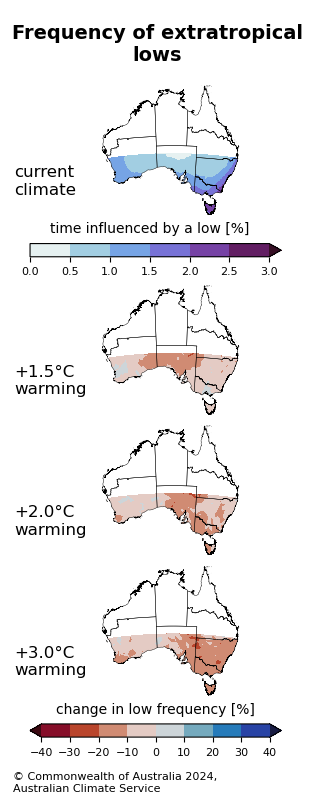

In [35]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["xts_freq"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,3.1, 0.5),
                 "tick_labels":None,
                 "cbar_label":"time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12.where(ds_gwl12["lat"]<=-28),
                         ds_gwl15=ds_gwl15.where(ds_gwl15["lat"]<=-28),
                         ds_gwl20=ds_gwl20.where(ds_gwl20["lat"]<=-28),
                         ds_gwl30=ds_gwl30.where(ds_gwl30["lat"]<=-28),
                         title = "Frequency of extratropical lows",
                         # date_range="Change from present",
                         cmap = cmap_dict["xts_freq_anom"],
                         # ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         ticks = np.arange(-40,41,10),
                         cbar_label = "change in low frequency [%]",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical",
                       cmap_bad="w",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                         issued_date="",
                      tick_rotation=0,
                      # vcentre=0,
                      )

In [19]:
# placeholder for Average annual lightning flash density across Australia for cloud-to-ground and cloud-to-cloud flashes, derived from satellite data from 1995-2002.

CPU times: user 2min 12s, sys: 234 ms, total: 2min 12s
Wall time: 2min 13s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

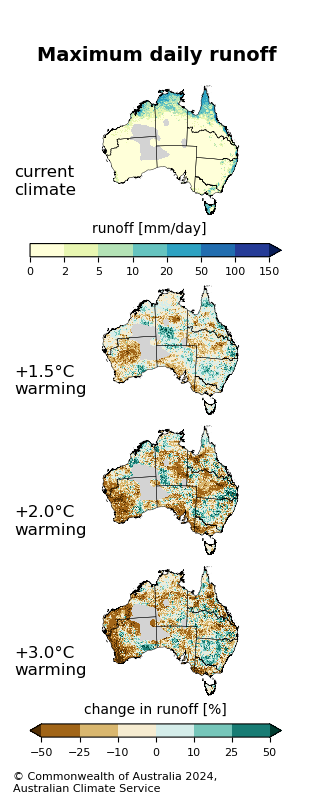

In [20]:
%%time

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_perc/max1day_runoff_ens_perc_1.2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_1.5.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_3.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12["runoff_1.2"],
                        gwl12_cmap=cmap_dict["pr"],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "runoff [mm/day]",
                         gwl12_ticks= [0,2,5,10,20,50,100,150],
                       ds_gwl15=ds_gwl15[f"runoff_1.5"],
                    ds_gwl20=ds_gwl20[f"runoff_2"],
                    ds_gwl30=ds_gwl30[f"runoff_3"],
                    regions = regions,
                    agcd_mask=True,
                    title = "Maximum daily runoff",
                    # date_range="Change from present",
                    cmap = cmap_dict["pr_anom"],
                    # ticks = np.arange(-50, 51,10),
                    ticks=[-50, -25, -10, 0, 10, 25, 50],
                    cbar_label = "change in runoff [%]",
                    cbar_extend="both",
                    watermark="",
                        orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                    tick_rotation=0,
)

CPU times: user 2min 7s, sys: 228 ms, total: 2min 7s
Wall time: 2min 7s


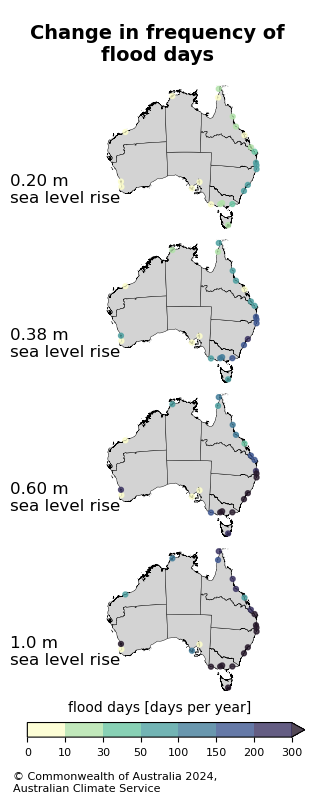

In [21]:
%%time 

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means_diff.csv")

plot_acs_hazard_4pp(station_df_gwl12=df[["lat", "lon", "0.2m 50th percentile"]].sort_values("0.2m 50th percentile"),
                    station_df_gwl15=df[["lat", "lon", "0.38m 50th percentile"]].sort_values("0.38m 50th percentile"),
                    station_df_gwl20=df[["lat", "lon", "0.6m 50th percentile"]].sort_values("0.6m 50th percentile"),
                    station_df_gwl30=df[["lat", "lon", "1.0m 50th percentile"]].sort_values("1.0m 50th percentile"),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=[0,10,30,50,100, 150,200, 300],
                    cbar_extend="max",
                    title = "Change in frequency of flood days",
                    cbar_label = "flood days [days per year]",
                    watermark=None,
                    facecolor="lightgrey",
                    orientation="vertical",
                     subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
                     issued_date="",
                    tick_rotation=0,);

CPU times: user 2min 7s, sys: 184 ms, total: 2min 8s
Wall time: 2min 8s


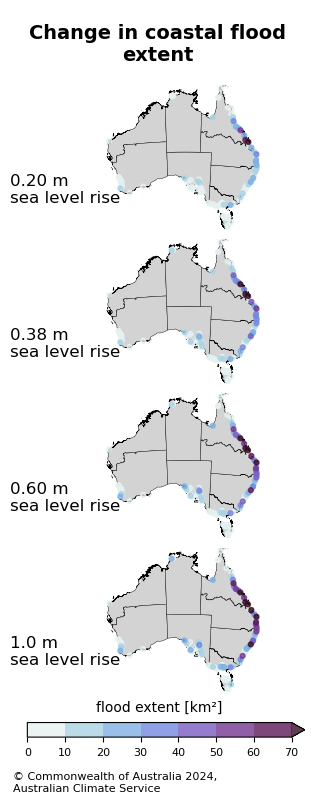

In [22]:
%%time 

var = "ext_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_extents/inundation_stats/results_2020_change.csv")

plot_acs_hazard_4pp(station_df_gwl12=df.where(df["SLR"]==0.2).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl15=df.where(df["SLR"]==0.38).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl20=df.where(df["SLR"]==0.60).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl30=df.where(df["SLR"]==1.00).dropna()[["lat", "lon", var]].sort_values(var),
                        regions = regions,
                        cmap=cmap_dict["xts_freq"],
                        ticks=np.arange(0,71,10),
                        cbar_extend="max",
                        title = "Change in coastal flood extent",
                        cbar_label = "flood extent [km\N{SUPERSCRIPT TWO}]",
                        watermark=None,
                        facecolor="lightgrey",
                       orientation="vertical",
                       subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
                        issued_date="",
                        tick_rotation=0,
);

In [23]:
# %%time 

# df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")

# plot_acs_hazard_4pp(station_df_gwl12=df[["lat", "lon", "0.2m 50th percentile"]].sort_values("0.2m 50th percentile"),
#                     station_df_gwl15=df[["lat", "lon", "0.38m 50th percentile"]].sort_values("0.38m 50th percentile"),
#                     station_df_gwl20=df[["lat", "lon", "0.6m 50th percentile"]].sort_values("0.6m 50th percentile"),
#                     station_df_gwl30=df[["lat", "lon", "1.0m 50th percentile"]].sort_values("1.0m 50th percentile"),
#                     regions = regions,
#                     cmap=cmap_dict["EHF_duration"],
#                     ticks=[0,1,5,10,30,50,100,200, 400],
#                     cbar_extend="max",
#                     title = "Change in coastal water level extremes",
#                     cbar_label = "[multiplication factor]",
#                     watermark=None,
#                     facecolor="lightgrey",
#                     orientation="vertical",
#                      subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
#                      issued_date="",
#                     tick_rotation=0,);

CPU times: user 2min 7s, sys: 185 ms, total: 2min 7s
Wall time: 2min 7s


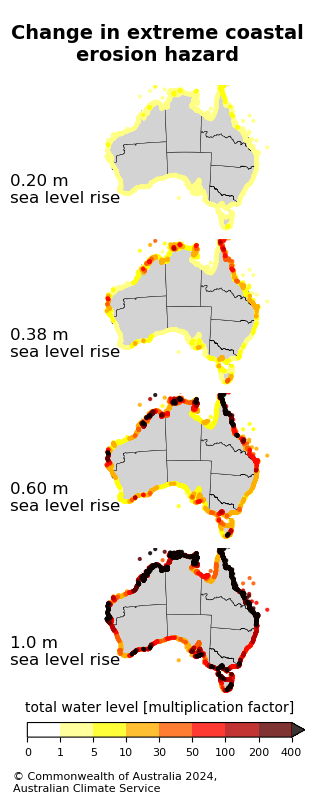

In [24]:
%%time 

#The MTWL MF is primarily a metric to evaluate the increase in coastal erosion for ocean coasts.


var = "MTWL_MFSLR_50"

df_slr020 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR14cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr038 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR32cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr060 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR54cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
df_slr100 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR94cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})

plot_acs_hazard_4pp(station_df_gwl12=df_slr020[["lat", "lon", var]].sort_values(var),
                    station_df_gwl15=df_slr038[["lat", "lon", var]].sort_values(var),
                    station_df_gwl20=df_slr060[["lat", "lon", var]].sort_values(var),
                    station_df_gwl30=df_slr100[["lat", "lon", var]].sort_values(var),
                    regions = regions,
                    cmap=cmap_dict["EHF_duration"],
                    ticks=[0,1,5,10,30,50,100,200, 400],
                    cbar_extend="max",
                    title = "Change in extreme coastal erosion hazard",
                    # date_range = " open ocean sandy beaches",
                    cbar_label = "total water level [multiplication factor]",
                    watermark=None,
                    facecolor="lightgrey",
                    orientation="vertical",
                    subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
                    issued_date="",
                    tick_rotation=0,
);


In [25]:
# %%time 

# #The SWL MF is primarily a metric to evaluate the increase in coastal flooding in protected harbors and estuaries due to SLR.
# var = "SWL_MFSLR_50"

# df_slr020 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR14cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
# df_slr038 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR32cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
# df_slr060 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR54cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})
# df_slr100 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_GESLA3_MMALL_SLR94cm.csv").rename(columns={"latitude":"lat", "longitude":"lon"})

# plot_acs_hazard_4pp(station_df_gwl12=df_slr020[["lat", "lon", var]].sort_values(var),
#                     station_df_gwl15=df_slr038[["lat", "lon", var]].sort_values(var),
#                     station_df_gwl20=df_slr060[["lat", "lon", var]].sort_values(var),
#                     station_df_gwl30=df_slr100[["lat", "lon", var]].sort_values(var),
#                     regions = regions,
#                     cmap=cmap_dict["xts_intensity"],
#                     ticks=[0,1,5,10,30,50,100,200, 400],
#                     cbar_extend="max",
#                     title = "Change in inundation exposure",
#                     # date_range = "in protected harbors and estuaries",
#                     cbar_label = "still water level [multiplication factor]",
#                     watermark=None,
#                     facecolor="lightgrey",
#                     orientation = "vertical",
#                     subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
#                     issued_date="",
#                     tick_rotation=0,
# );


In [26]:
# placeholder for Sea surface temperature trends throughout the Australian region (4–46oS and 94–174oE) (a) over 1950–2023 based on the NOAA Extended Reconstructed SST (ERSST) v5 product, and (b) over 1981–2023 based on the Optimum Interpolation SST (OISST) product derived from various in-situ and satellite observation platforms. (SoC 2022) 

In [27]:
# placeholder for  The change in pH for the surface waters surrounding Australia between 1982 and 2022 (data sourced from the OceanSODA-ETHZ dataset). 
# Calculations are based on data from the Integrated Marine Observing System and other programs. (SoC 2022)

CPU times: user 4min 40s, sys: 6.43 s, total: 4min 46s
Wall time: 4min 49s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

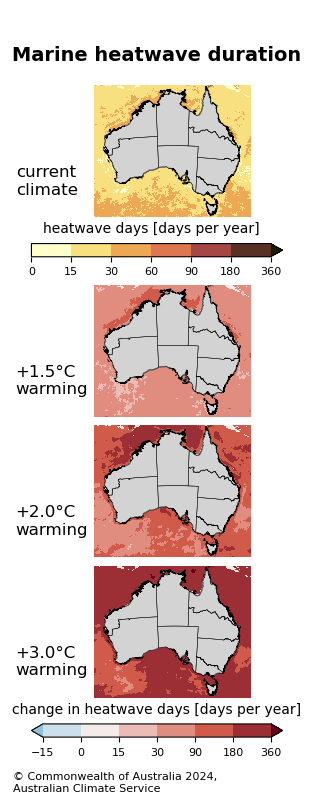

In [4]:
%%time
var="duration"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW1p2_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW1p5_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl20 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW2p0_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})
ds_gwl30 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/GW3p0_mhw.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"})


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_temp_seq'],
                         gwl12_cbar_extend= "max",
                         gwl12_cbar_label= "heatwave days [days per year]",
                         gwl12_ticks= [0, 15, 30, 60, 90, 180, 360],
                        ds_gwl15=ds_gwl15[var] ,
                    ds_gwl20=ds_gwl20[var] ,
                    ds_gwl30=ds_gwl30[var] ,
                    regions = regions,
                    title = "Marine heatwave duration",
                    # date_range="",
                    cmap = cmap_dict["ipcc_temp_div"],
                    ticks = [-15, 0, 15, 30, 90, 180, 360],
                    cbar_label = "change in heatwave days [days per year]",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                       tick_rotation=0,
                       vcentre=0,
                      )

CPU times: user 2min 53s, sys: 5.02 s, total: 2min 59s
Wall time: 2min 59s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

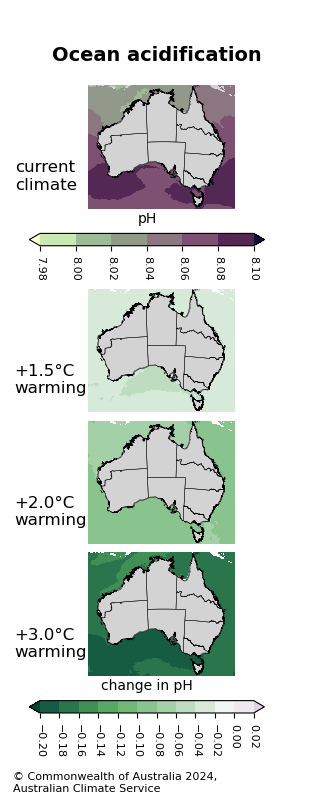

In [5]:
%%time
var="PH"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW1p2.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW1p5.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl20 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW2p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")
ds_gwl30 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/PH_climatology_GW3p0.nc")\
.rename({"XT_OCEAN":"lon", "YT_OCEAN":"lat"}).sel(ST_OCEAN=2.5).drop_vars("ST_OCEAN").mean(dim="month")


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_chem_seq'],
                         gwl12_cbar_extend= "both",
                         gwl12_cbar_label= "pH",
                         gwl12_ticks= np.arange(7.98,8.12, 0.02),
                        ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                    ds_gwl20=ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                    regions = regions,
                    title = "Ocean acidification",
                    # date_range="",
                    cmap = cmap_dict["ipcc_chem_div"],
                    # ticks = [-0.20, -0.14, -0.10, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.10, 0.14, 0.20],
                    ticks=np.arange(-0.20, 0.021, 0.02),
                    cbar_label = "change in pH",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                       vcentre=0,
                      )

In [30]:
# figures below are extra - not in the document

CPU times: user 2min 51s, sys: 5.1 s, total: 2min 56s
Wall time: 2min 56s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

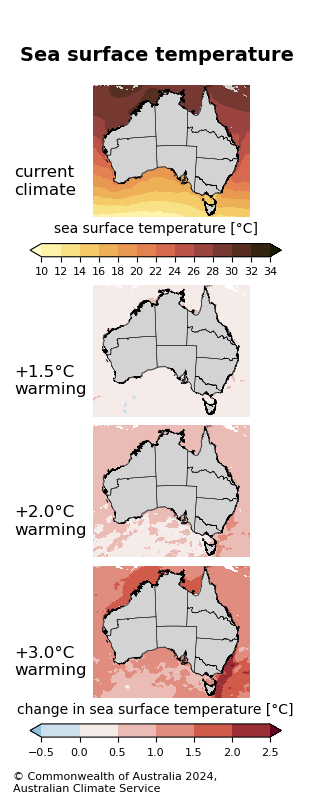

In [9]:
%%time
var="temp"

ds_gwl12 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW1p2.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")

ds_gwl15 =  xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW1p5.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")
ds_gwl20 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW2p0.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")
ds_gwl30 =   xr.open_dataset(f"/g/data/ia39/ncra/ocean/sst_climatology_GW3p0.nc").rename({"xt_ocean":"lon", "yt_ocean":"lat"}).sel(st_ocean=2.5).drop_vars("st_ocean").mean(dim="month")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       gwl12_cmap=cmap_dict['ipcc_temp_seq'],
                         gwl12_cbar_extend= "both",
                         gwl12_cbar_label= "sea surface temperature [\N{DEGREE SIGN}C]",
                         gwl12_ticks= np.arange(10,35, 2),
                        ds_gwl15=ds_gwl15[var] -ds_gwl12[var],
                    ds_gwl20=ds_gwl20[var] -ds_gwl12[var] ,
                    ds_gwl30=ds_gwl30[var] -ds_gwl12[var],
                    regions = regions,
                    title = "Sea surface temperature",
                    # date_range="",
                    cmap = cmap_dict["ipcc_temp_div"],
                    ticks = np.arange(-0.5, 2.51, 0.5),
                    cbar_label = "change in sea surface temperature [\N{DEGREE SIGN}C]",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True,
                      orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    issued_date="",
                      tick_rotation=0,
                       vcentre=0,
                      )

CPU times: user 3min 55s, sys: 661 ms, total: 3min 55s
Wall time: 3min 55s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

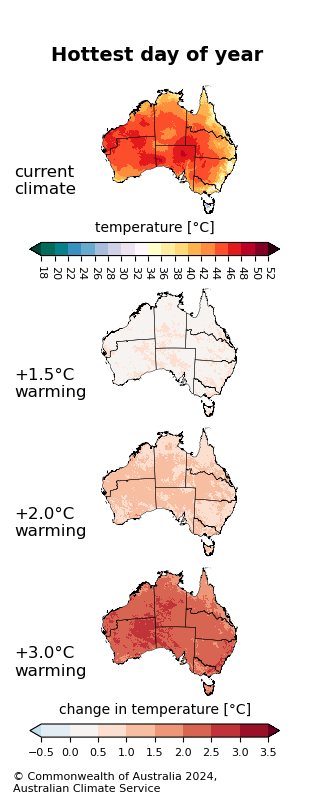

In [7]:
%%time 

var = "TXx"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

gwl12_kwargs={"cmap": cmap_dict["tasmax"],
                 "cbar_extend":"both",
                 "ticks":np.arange(18,53,2),
                 "tick_labels":None,
                 "cbar_label":"temperature [\N{DEGREE SIGN}C]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Hottest day of year",
                        # date_range = f"Change from present climate",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-0.5, 3.6, 0.5),
                        cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                        watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      vcentre=0,
                      tick_rotation=0,
                      gwl12_tick_rotation=-90,
                      )

In [33]:
# %%time 

# var = "HWF"

# ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-average/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
# ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
# ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
# ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")


# gwl12_kwargs={"cmap": cmap_dict["tasmax"],
#                  "cbar_extend":"both",
#                  "ticks":np.arange(18,53,2),
#                  "tick_labels":None,
#                  "cbar_label":"temperature [\N{DEGREE SIGN}C]"}


# plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
#                        gwl12_cmap=cmap_dict["EHF_days"],
#                          gwl12_cbar_extend= "max",
#                          gwl12_cbar_label= "heatwave days [days per year]",
#                          gwl12_ticks= np.arange(0,165, 15),
#                          gwl12_tick_labels=gwl12_kwargs["tick_labels"],
#                        ds_gwl15=ds_gwl15[var],
#                         ds_gwl20=ds_gwl20[var],
#                         ds_gwl30=ds_gwl30[var],
#                         regions = regions,
#                         title = "Heatwave days per year",
#                         # date_range = f"Change from present climate",
#                         cmap = cmap_dict["ipcc_temp_div"],
#                         ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
#                         cbar_label = "change in heatwave days [days per year]",
#                         watermark="",
#                        orientation="vertical",
#                         subplot_titles=["current\nclimate",
#                                         "+1.5\N{DEGREE SIGN}C\nwarming",
#                                         "+2.0\N{DEGREE SIGN}C\nwarming",
#                                         "+3.0\N{DEGREE SIGN}C\nwarming"],
#                         issued_date="",)